In [1]:
library(miloR)
library(igraph)
library(BiocParallel)
library(SingleCellExperiment)
library(Matrix)
library(dplyr)
setwd('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

Loading required package: edgeR

Loading required package: limma


Attaching package: ‘igraph’


The following object is masked from ‘package:miloR’:

    graph


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    c

In [3]:
load('h5ad/df.fil3_gex_bcells_vdj_trimmed_milo_prep.RData')

mylo <- Milo(adata_no_knnx)
milo_graph <- buildFromAdjacency(knn_adjacencyx, k=50, is.binary=TRUE)
miloR::graph(mylo) <- miloR::graph(milo_graph)

In [8]:
mylo <- buildGraph(mylo, k=50, d=50, reduced.dim="PCA", BPPARAM = MulticoreParam(progressbar = TRUE))
mylo <- makeNhoods(mylo, prop = 0.3, k=50, d=50, reduced_dim="PCA")

  |======================================================================| 100%



Constructing kNN graph with k:50

Checking valid object



In [9]:
mylo <- countCells_(mylo, meta.data = data.frame(colData(mylo)), samples="sample_id")
mylo <- calcNhoodDistance(mylo, d=50, reduced.dim = 'PCA', use.assay = 'counts')
mylo <- buildNhoodGraph(mylo)
saveRDS(mylo, 'h5ad/df.fil3_gex_bcells_vdj_trimmed_milo.RDS')

Checking meta.data validity

Counting cells in neighbourhoods



In [1]:
# kernel died...
library(miloR)
library(igraph)
library(BiocParallel)
library(SingleCellExperiment)
library(Matrix)
library(dplyr)
setwd('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

Loading required package: edgeR

Loading required package: limma


Attaching package: ‘igraph’


The following object is masked from ‘package:miloR’:

    graph


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    c

In [2]:
mylo <- readRDS('h5ad/df.fil3_gex_bcells_vdj_trimmed_milo.RDS')
metadata = data.frame(colData(mylo))
metadata$case_control <- ordered(factor(metadata$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY')))
metadata$ethnicity = factor(metadata$ethnicity)
metadata$sex = factor(metadata$sex)

In [3]:
# remove 
metadata <- distinct(metadata[, c('sample_id', 'individual_id', 'case_control', 'sex', 'ethnicity', 'calc_age', 'days_to_admission')], .keep_all = TRUE)
head(metadata)

,sample_id,individual_id,case_control,sex,ethnicity,calc_age,days_to_admission
,<fct>,<fct>,<ord>,<fct>,<fct>,<int>,<dbl>
UK-CIC10689738+UK-CIC10690026_AAACCTGAGACTAGAT-1,C116_0205,C116,POSITIVE,M,white,87,2
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1,C123_0505,C123,POSITIVE,M,asian,66,2
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1,C103_2204,C103,NEGATIVE,M,asian,66,0
UK-CIC10689740+UK-CIC10690028_AAACCTGAGACCCACC-1,C214_2705,C214,NEGATIVE,F,white,68,0
UK-CIC10689740+UK-CIC10690028_AAACGGGAGCTCCTCT-1,C42_1504,C42,POSITIVE,M,white,40,0
UK-CIC10689740+UK-CIC10690028_AAAGCAATCAACACAC-1,C40_0105,C40,POSITIVE,M,black,57,5


In [4]:
library(lmerTest)
library(pbmcapply)

Loading required package: lme4


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [5]:
res <- as.list(1:nrow(nhoodCounts(mylo)))
res <- pbmclapply(res, function(x) glmer.nb(nhoodCounts(mylo)[x,] ~ sex + ethnicity + calc_age + (1|individual_id) + offset(log(colSums(nhoodCounts(mylo)))) + case_control, data = metadata, control=glmerControl(check.conv.singular = .makeCC(action = "ignore",  tol = 1e-2), optimizer="bobyqa", tol=1e-02)), mc.cores = parallel::detectCores())
res_summary <- pbmclapply(res, summary)
save(res_summary, res, metadata, file = 'h5ad/df.fil3_gex_bcells_vdj_trimmed_milo_results.RData')

In [9]:
# example coefficients for 1 neighborhood
res_summary[[1]]$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-6.41848501,0.312118011,-20.56428912,5.733390e-94
sexM,-0.16671061,0.134796799,-1.23675499,2.161781e-01
ethnicityblack,-0.53572912,0.236347719,-2.26669893,2.340862e-02
ethnicityother,-0.19112698,0.252722682,-0.75627157,4.494864e-01
ethnicitywhite,-0.21189973,0.150935623,-1.40390798,1.603463e-01
calc_age,-0.01041687,0.004624279,-2.25264768,2.428137e-02
case_control.L,-0.01092310,0.153254422,-0.07127431,9.431794e-01
case_control.Q,0.16092972,0.098730402,1.62999153,1.031033e-01


In [10]:
pvalue_L <- pbmclapply(res_summary, function(x) x$coefficients[7,4]) # linear
pvalue_Q <- pbmclapply(res_summary, function(x) x$coefficients[8,4]) # quadratic
beta_L <- pbmclapply(res_summary, function(x) x$coefficients[7,1]) # linear
beta_Q <- pbmclapply(res_summary, function(x) x$coefficients[8,1]) # linear

In [11]:
da.res_L = data.frame(Nhood = as.numeric(1:nrow(nhoodCounts(mylo))), beta = do.call(c, beta_L), PValue = do.call(c, pvalue_L))
da.res_Q = data.frame(Nhood = as.numeric(1:nrow(nhoodCounts(mylo))), beta = do.call(c, beta_Q), PValue = do.call(c, pvalue_Q))

In [13]:
da.res_L$SpatialFDR <- graphSpatialFDR(x.nhoods=nhoods(mylo), graph=miloR::graph(mylo),
    weighting='k-distance', pvalues=da.res_L$PValue,
    indices=nhoodIndex(mylo), distances=nhoodDistances(mylo),
    reduced.dimensions=reducedDim(mylo, 'PCA'), k = 50)
da.res_L$Diff <- sign(da.res_L$beta)
da.res_L$Diff[da.res_L$SpatialFDR >= 0.1] <- 0
saveRDS(da.res_L, file = 'h5ad/df.fil3_gex_bcells_vdj_trimmed_milo_results_case_control_linear.RDS')

In [14]:
da.res_Q$SpatialFDR <- graphSpatialFDR(x.nhoods=nhoods(mylo), graph=miloR::graph(mylo),
    weighting='k-distance', pvalues=da.res_Q$PValue,
    indices=nhoodIndex(mylo), distances=nhoodDistances(mylo),
    reduced.dimensions=reducedDim(mylo, 'PCA'), k = 50)
da.res_Q$Diff <- sign(da.res_Q$beta)
da.res_Q$Diff[da.res_Q$SpatialFDR >= 0.1] <- 0
saveRDS(da.res_Q, file = 'h5ad/df.fil3_gex_bcells_vdj_trimmed_milo_results_case_control_quadratic.RDS')

In [15]:
table(da.res_L$Diff)


  -1    0    1 
   3 2717    1 

not many differentially abundant neighborhoods linearly.

In [16]:
table(da.res_Q$Diff)


  -1    0    1 
  45 2581   95 

But seems like there's some n/u shape changes.

In [17]:
da.res_L <- annotateNhoods(mylo, da.res_L, coldata_col = "celltype_B_corrected")
da.res_Q <- annotateNhoods(mylo, da.res_Q, coldata_col = "celltype_B_corrected")

In [18]:
da.res_L$celltype_B_corrected <- ifelse(da.res_L$celltype_B_corrected_fraction < 0.7, "Mixed", da.res_L$celltype_B_corrected)
da.res_Q$celltype_B_corrected <- ifelse(da.res_Q$celltype_B_corrected_fraction < 0.7, "Mixed", da.res_Q$celltype_B_corrected)

In [19]:
library(ggbeeswarm)
library(ggplot2)
new_DA_beeswarm_split <- function (da.res1, da.res2, max = 5, color.by = 'SpatialFDR', group.by = NULL, split.by =NULL, alpha = 0.1, subset.nhoods = NULL, size = 2, filter = c('Mixed', 'doublets')) 
{
    da.res1$split = split.by[1]
    da.res2$split = split.by[2]
    da.res <- rbind(da.res1, da.res2)
    da.res$beta[da.res$beta > max] <- max
    da.res$beta[da.res$beta < -max] <- -max
    da.res <- da.res %>% filter(!get(group.by) %in% filter)
    if (!is.null(group.by)) {
        if (!group.by %in% colnames(da.res)) {
            stop(paste0(group.by, " is not a column in da.res. Have you forgot to run annotateNhoods(x, da.res, ", 
                group.by, ")?"))
        }
        if (is.numeric(da.res[, group.by])) {
            stop(paste0(group.by, " is a numeric variable. Please bin to use for grouping."))
        }
        da.res <- mutate(da.res, group_by = da.res[, group.by])
    }else {
        da.res <- mutate(da.res, group_by = "g1")
    }    
    if (!is.factor(da.res[, "group_by"])) {
        message(paste0("Converting group.by to factor..."))
        da.res <- mutate(da.res, factor(group_by, levels = unique(group_by)))
    }
    if (!is.null(subset.nhoods)) {
        da.res <- da.res[subset.nhoods, ]
    }
    
    da.res <- da.res %>% mutate(is_signif = ifelse(get(color.by) < alpha, 
        1, 0)) %>% mutate(beta_color = ifelse(is_signif == 1, 
        beta, NA)) %>% arrange(group_by) %>% mutate(Nhood = factor(Nhood, 
        levels = unique(Nhood)))
    
    p <- ggplot(da.res, aes(group_by, beta, color = beta_color)) + 
        scale_color_gradient2(midpoint = 0, low = "#0571b0", mid = '#f7f7f7', high = "#ca0020", limits=c(-max/3, max/3), oob=scales::squish) +
        guides(color = "none") + 
        xlab(group.by) + 
        ylab("beta") + 
        geom_quasirandom(alpha = 1, size = size) +
        coord_flip() + 
        theme_bw() + 
        theme(axis.title.y = element_blank(),
              axis.title.x = element_text(size=20, color = '#000000'),
              axis.text = element_text(size=20, color = '#000000'),
              axis.ticks = element_line(color = '#000000'),
              panel.border = element_rect(colour = "#000000")
            ) + 
        facet_wrap(split~.) +
        theme(strip.background = element_blank(), strip.text.x = element_text(angle = 0, size = 20, color = '#000000'))
    p$data <- p$data[order(p$data$beta_color, na.last = FALSE), ]
    return(p)
}

Loading required package: ggplot2



Converting group.by to factor...



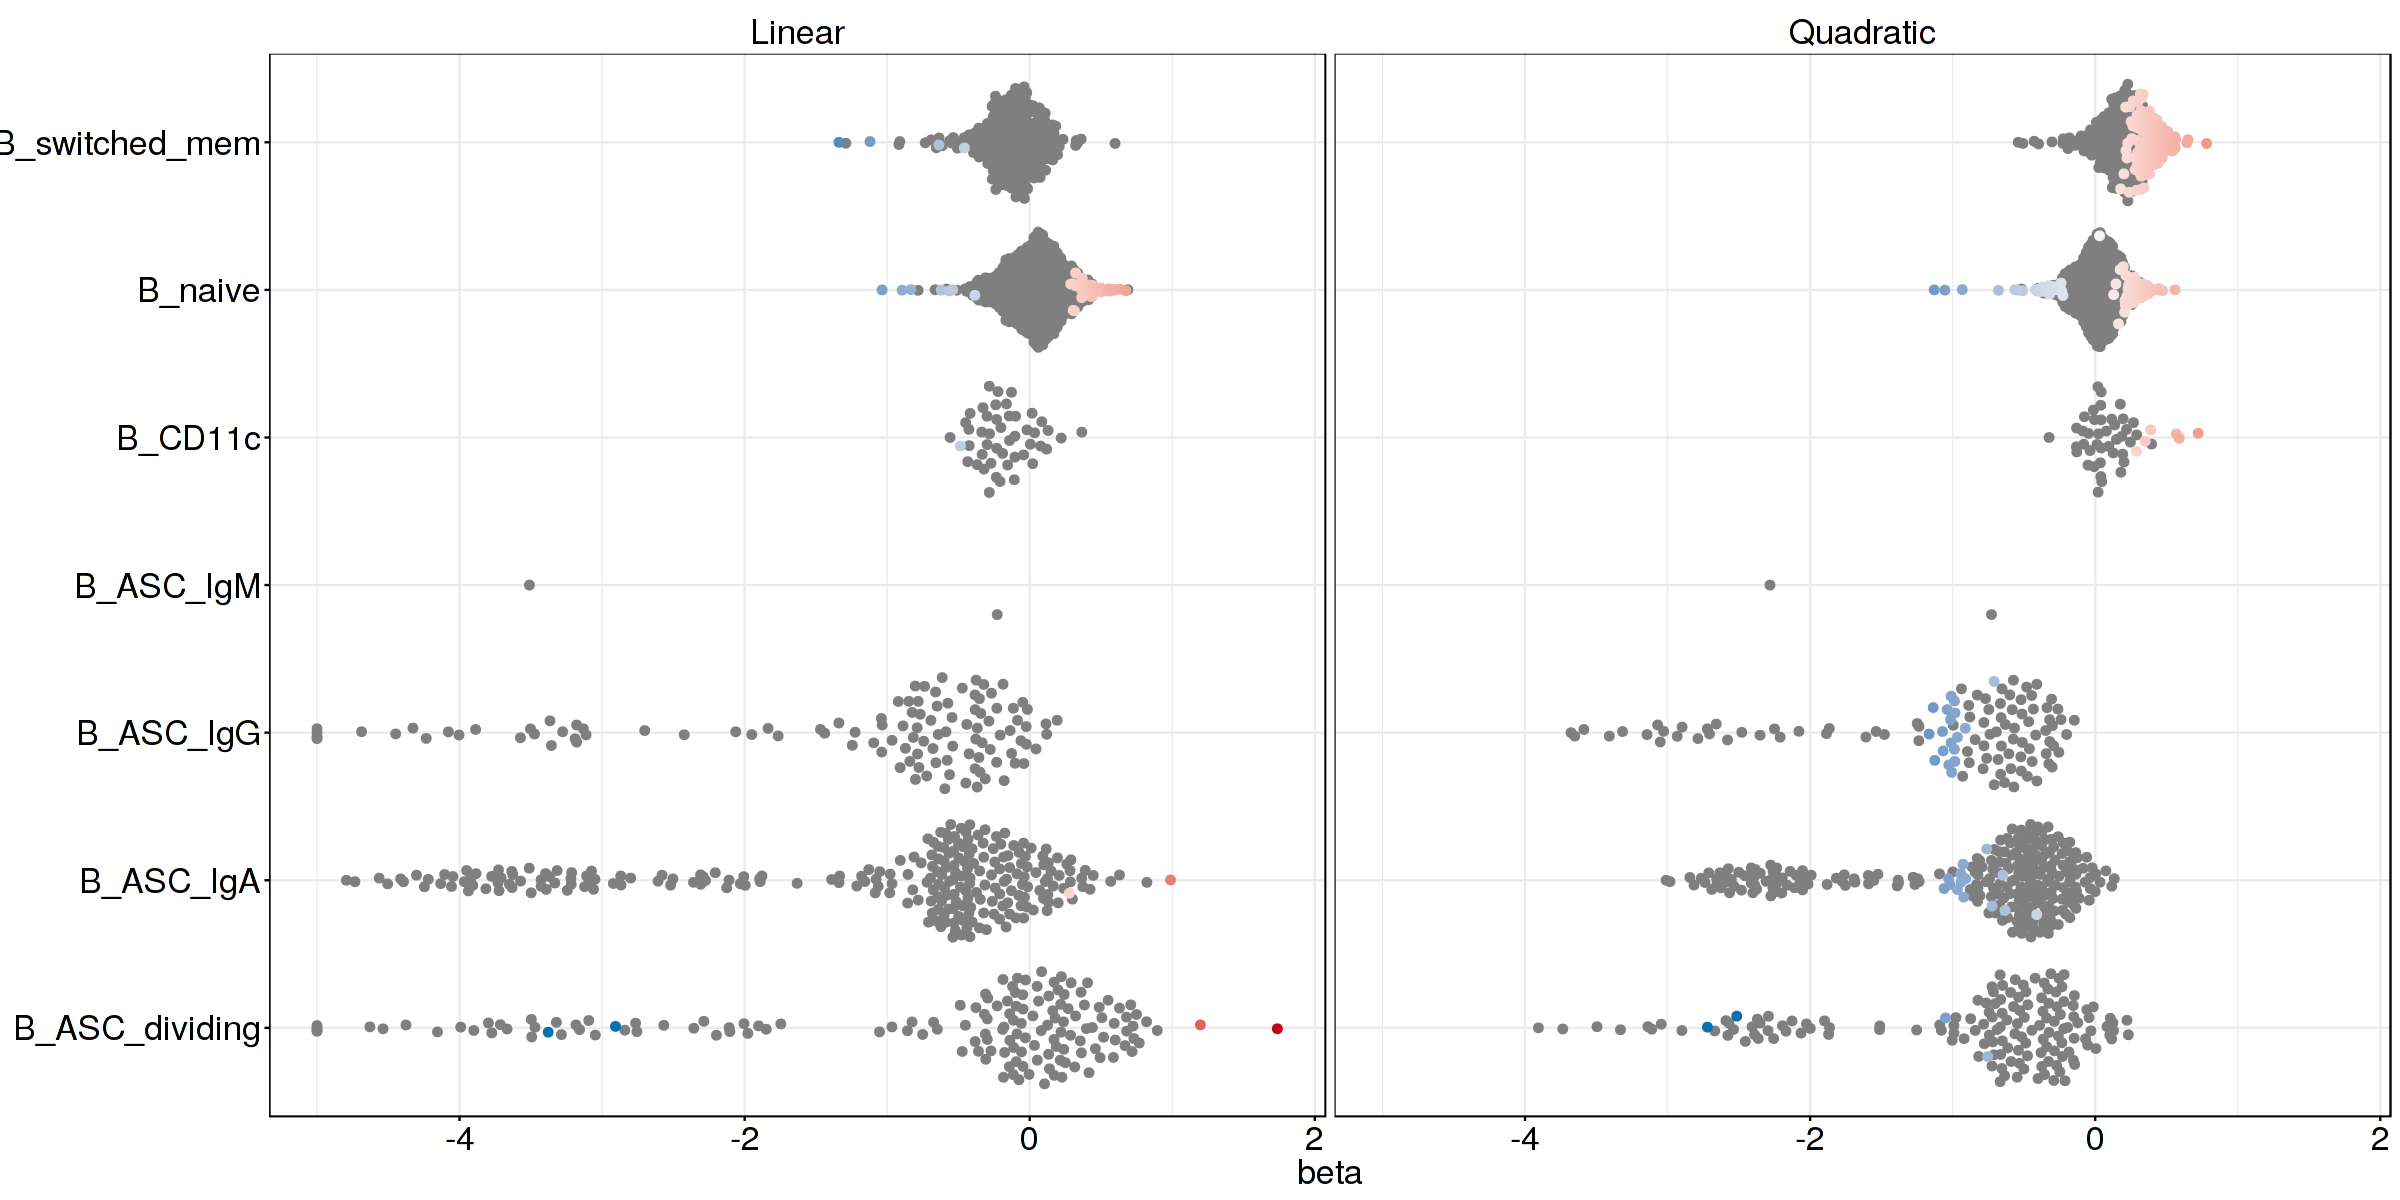

In [21]:
options(repr.plot.width=20, repr.plot.height=10)
p <- new_DA_beeswarm_split(da.res_L, da.res_Q, color.by = 'PValue', group.by = "celltype_B_corrected", split.by = c('Linear', 'Quadratic'), size = 2, alpha = .05)
p

negative beta for quadatic is more u shape and positive is more n shape.